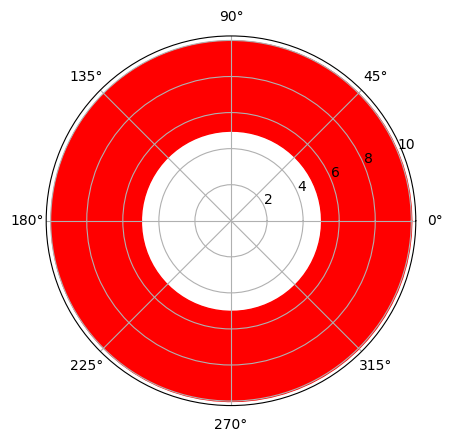

In [1]:
%matplotlib notebook
from matplotlib.figure import Figure
import numpy as np
fig = Figure()
theta = np.linspace(0., 2.*np.pi, 80, endpoint=True)
ax = fig.add_subplot(111, polar=True)
a=ax.fill_between(theta, 5., 10., color="red")
display(fig)

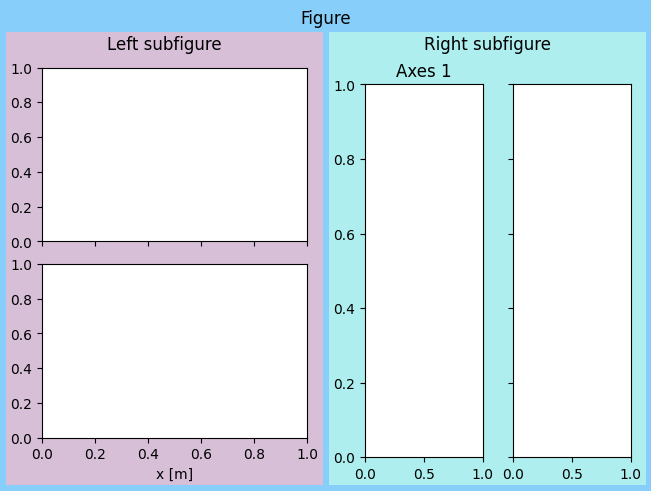

In [2]:
fig = Figure(layout='constrained', facecolor='lightskyblue')
fig.suptitle('Figure')
figL, figR = fig.subfigures(1, 2)
figL.set_facecolor('thistle')
axL = figL.subplots(2, 1, sharex=True)
axL[1].set_xlabel('x [m]')
figL.suptitle('Left subfigure')
figR.set_facecolor('paleturquoise')
axR = figR.subplots(1, 2, sharey=True)
axR[0].set_title('Axes 1')
figR.suptitle('Right subfigure')
display(fig)

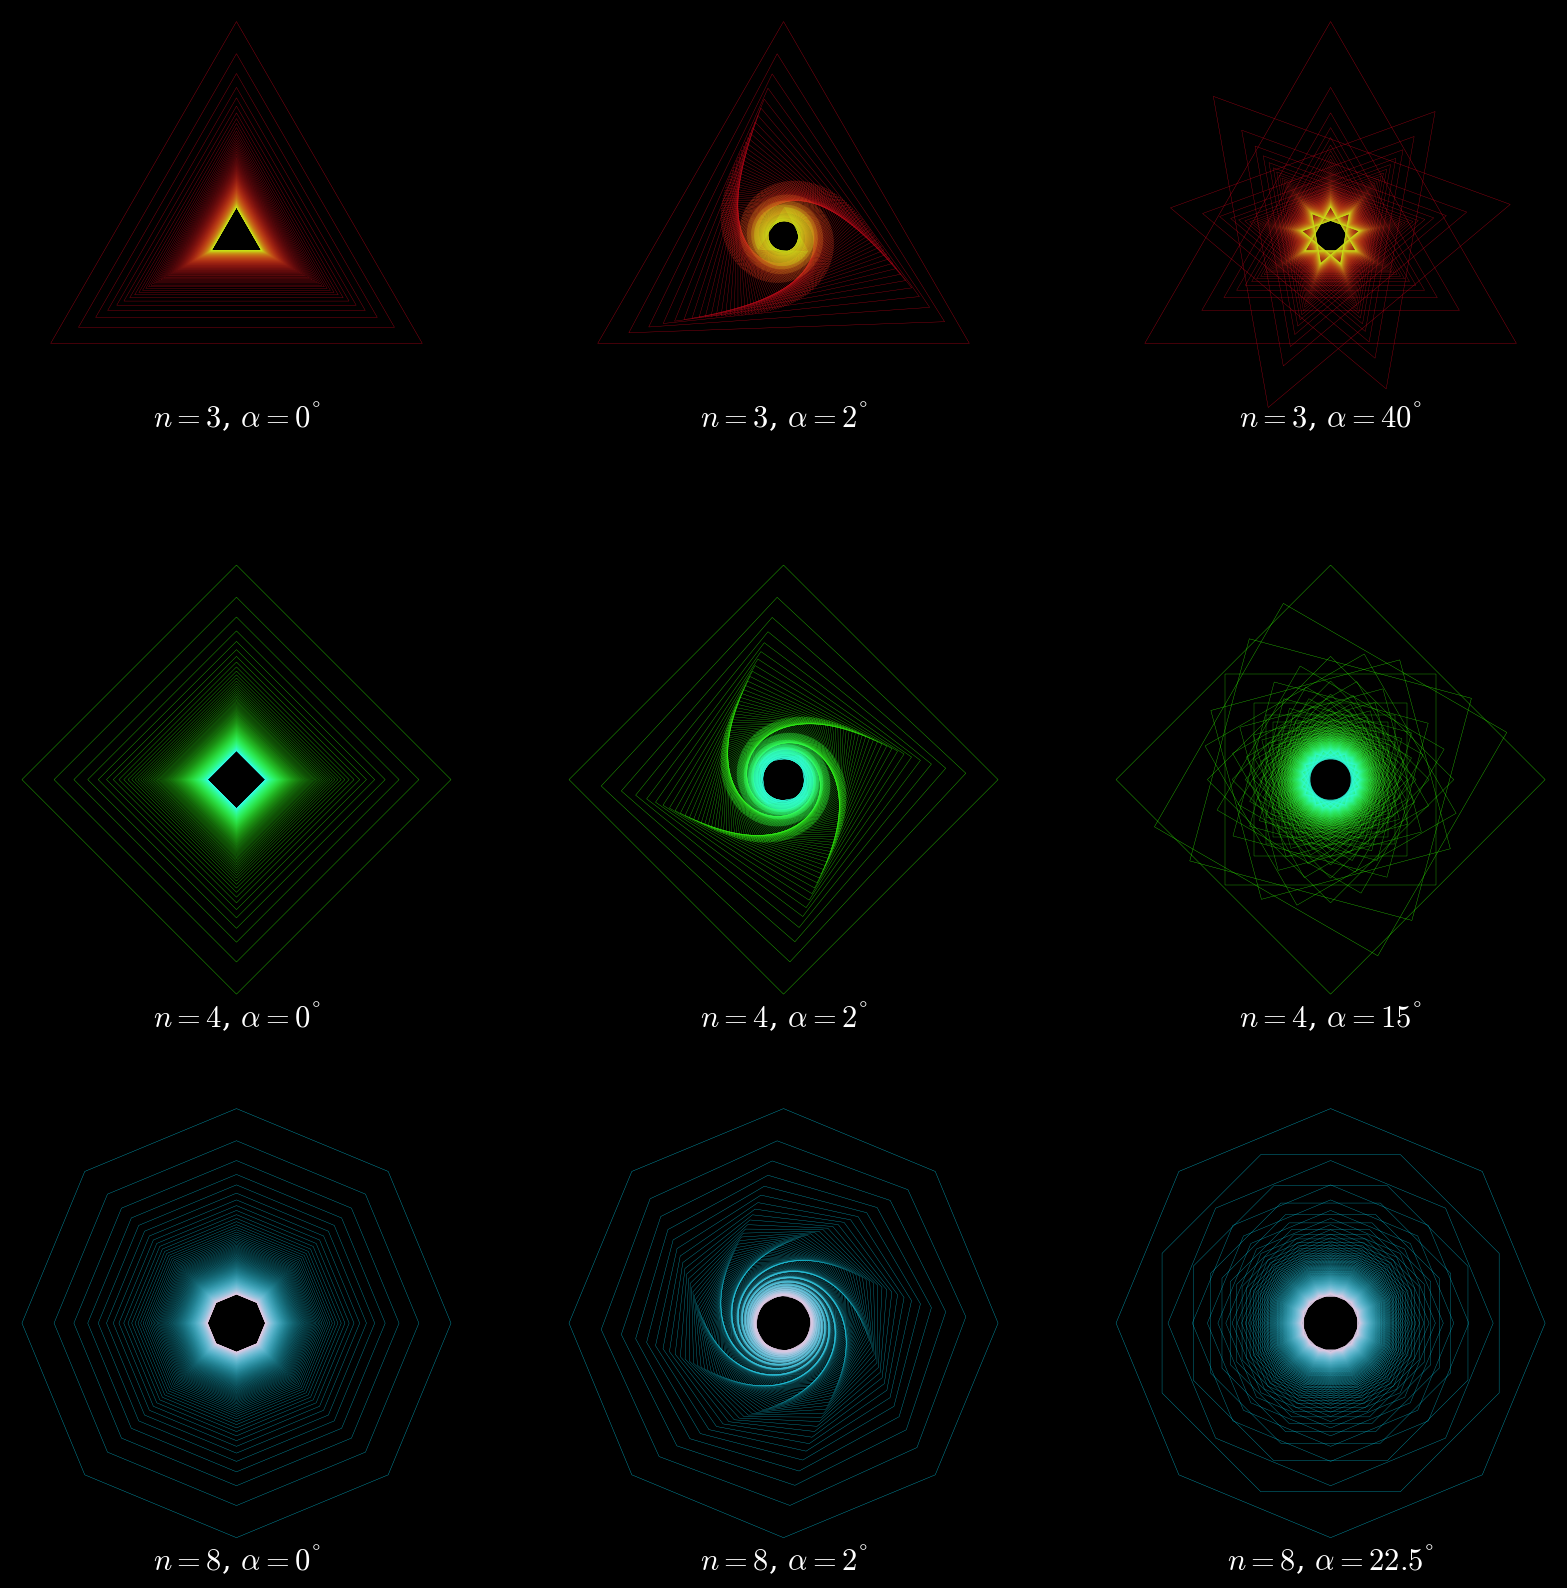

In [4]:
%matplotlib inline
# This Python 3 script creates a 3x3 chart of nested and twisted regular polygons.
# Needs matplotlib and numpy.
# Copyright Nikodemus Karlsson.
# This work is released under CC-BY license.

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
plt.style.use("dark_background")
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['font.family'] = 'serif'

### This parameters can easily be changed ###
monochrome = False # If True, the chart is produced in light colors and the polygons in gray scale.
saveExtents = False # Save each polygon plot to a png file?
saveFigure = True # Save all chart to png file?
showTextLabels = True # With or without text telling the number of sides and angle?
fontSize = 22 # Obvious
subpol = 300 # Number of turned polygons inside each other
nv = [3, 4, 8] # Number of vertices in each row
rotation = [[0, 2, 40], [0, 2, 15], [0, 2, 22.5]] # Rotation in degrees for inside polygon with respect to the closest outside one
lineWidth = 0.25 # Obvious
lineStyle = 'solid' # 'solid', 'dashed' or 'dotted'
figSize = 20 
dpi = 100
### End easily changeable parameters ###

xlimit = (-0.8, 0.8)
ylimit = (-0.8, 0.8)
x, y = 0, 0 # center of each polygon
color = np.linspace(0, .9, subpol) # Need for color variation

if monochrome:
    plt.style.use("default")
    plt.rcParams["mathtext.fontset"] = "cm"
    plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(3, 3, # 3 rows and 3 columns
                       figsize=(figSize, figSize), 
                       dpi=100)

# Create row 0
row = 0
# Outer loop, 3 columns. Each columns consists of triangles turned
# in different angles.
for col in range(0, 3):
    rot = rotation[row]
    
    # Inner loop, operates on one column. Creates the turned triangles
    # in different sizes.
    for j in range(0, subpol):
        if monochrome:
            edgeColor = [0,0,0, 1/((j+1)**(0.5))]
        else:
            edgeColor = [0.8, color[j], 0.1, 1/((j+2)**(0.1))]
            
        polyParams = {'facecolor':'none',                                                                                 
          'edgecolor':edgeColor,
          'linewidth':lineWidth,
          'linestyle':lineStyle,
          'radius': 1/((j+2)**0.4),
          'numVertices': nv[row],
          'xy': (x, y),
          'orientation': 0} # I use rotate_deg_around() below, rather than orientation parameter
        
        rotationParams = {'degrees':j*rot[col]}
        
        textParams = {
                      'verticalalignment': 'center',
                      'horizontalalignment': 'center',
                      'fontsize': fontSize,
                      'transform': ax[row, col].transAxes} # Relative coordinates 0 - 1
        
        polygon = mpatches.RegularPolygon(**polyParams)
        transform = mpl.transforms.Affine2D().rotate_deg_around(x, y, **rotationParams)
        p = ax[row, col].add_patch(polygon)
        polygon.set_transform(transform+ax[row, col].transData)
        
    ax[row, col].set_aspect('equal')
    ax[row, col].axis('off')
    ax[row, col].set_xlim(xlimit)
    ax[row, col].set_ylim(ylimit)
    
    if showTextLabels:
        plt.text(0.5, 0.1, f'$n={nv[row]}$, $\\alpha = {rot[col]}^\degree$', **textParams)
        
    if saveExtents:
        extent = ax[row, col].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        if showTextLabels:
            fig.savefig(f'polygon_{nv[row]}_{col}.png', bbox_inches=extent)
        else:
            fig.savefig(f'polygon_{nv[row]}_{col}.png', bbox_inches=extent)
        
# Create row 1
row = 1
# Outer loop, 3 columns. Each columns consists of triangles turned
# in different angles.
for col in range(0, 3):
    rot = rotation[row]
    
    # Inner loop, operates on one column. Creates the turned triangles
    # in different sizes.
    for j in range(0, subpol):
        if monochrome:
            edgeColor = [0,0,0, 1/((j+1)**(0.5))]
        else:
            edgeColor = [0.2, 1, color[j], 1/((j+2)**(0.1))]
            
        polyParams = {'facecolor':'none',                                                                                 
          'edgecolor':edgeColor,
          'linewidth':lineWidth,
          'linestyle':lineStyle,
          'radius': 1/((j+2)**0.4),
          'numVertices': nv[row],
          'xy': (x, y),
          'orientation': 0}
        
        rotationParams = {'degrees':j*rot[col]}
        
        textParams = {
                      'verticalalignment': 'center',
                      'horizontalalignment': 'center',
                      'fontsize': fontSize,
                      'transform': ax[row, col].transAxes}
        
        polygon = mpatches.RegularPolygon(**polyParams)
        transform = mpl.transforms.Affine2D().rotate_deg_around(x, y, **rotationParams)
        p = ax[row, col].add_patch(polygon)
        polygon.set_transform(transform+ax[row, col].transData)
        
    ax[row, col].set_aspect('equal')
    ax[row, col].axis('off')
    ax[row, col].set_xlim(xlimit)
    ax[row, col].set_ylim(ylimit)
    
    if showTextLabels:
        ax[row, col].text(0.5, -0.025, f'$n={nv[row]}$, $\\alpha = {rot[col]}^\degree$', **textParams)

    if saveExtents:
        extent = ax[row, col].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        if showTextLabels:
            fig.savefig(f'polygon_{nv[row]}_{col}.png', bbox_inches=extent.expanded(1.1, 1.2))
        else:
            fig.savefig(f'polygon_{nv[row]}_{col}.png', bbox_inches=extent)

# Create row 2
row = 2
# Outer loop, 3 columns. Each columns consists of triangles turned
# in different angles.
for col in range(0, 3):
    rot = rotation[row]
    
    # Inner loop, operates on one column. Creates the turned triangles
    # in different sizes.
    for j in range(0, subpol):
        if monochrome:
            edgeColor = [0,0,0, 1/((j+1)**(0.5))]
        else:
            edgeColor = [color[j], 0.8, 0.9, 1/((j+2)**(0.1))]
            
        polyParams = {'facecolor':'none',                                                                                 
          'edgecolor':edgeColor,
          'linewidth':lineWidth,
          'linestyle':lineStyle,
          'radius': 1/((j+2)**0.4),
          'numVertices': nv[row],
          'xy': (x, y),
          'orientation': 0}
        
        rotationParams = {'degrees':j*rot[col]}
        
        textParams = {
                      'verticalalignment': 'center',
                      'horizontalalignment': 'center',
                      'fontsize': fontSize,
                      'transform': ax[row, col].transAxes}
        
        polygon = mpatches.RegularPolygon(**polyParams)
        transform = mpl.transforms.Affine2D().rotate_deg_around(x, y, **rotationParams)
        p = ax[row, col].add_patch(polygon)
        polygon.set_transform(transform+ax[row, col].transData)
        
    ax[row, col].set_aspect('equal')
    ax[row, col].axis('off')
    ax[row, col].set_xlim(xlimit)
    ax[row, col].set_ylim(ylimit)
    
    if showTextLabels:
        ax[row, col].text(0.5, -0.025, f'$n={nv[row]}$, $\\alpha = {rot[col]}^\degree$', **textParams)
    
    if saveExtents:
        extent = ax[row, col].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        if showTextLabels:
            fig.savefig(f'polygon_{nv[row]}_{col}.png', bbox_inches=extent.expanded(1.1, 1.2))
        else:
            fig.savefig(f'polygon_{nv[row]}_{col}.png', bbox_inches=extent)
